In [1]:
%load_ext autoreload
%autoreload 2

from cap.dehaze import dehaze as cap_dehaze
from dcp.dehaze import dehaze as dcp_dehaze
from config import config
# from measure import compute_psnr, compute_ssim
import os
from glob import glob
from matplotlib import pyplot as plt
import cv2
import numpy as np
# from fastprogress.fastprogress import master_bar, progress_bar
import multiprocessing as mp
from tqdm import tqdm
from sklearn.metrics import mean_squared_error as compute_mse
from skimage.metrics import peak_signal_noise_ratio as compute_psnr
from skimage.metrics import structural_similarity as compute_ssim

In [2]:
_RESIDE_PATH = 'D:\\data\\reside\\indoor_train'
_RESULT_PATH = '../result'

In [3]:
hazy_fold_path = os.path.join(_RESIDE_PATH,'hazy')
clear_fold_path = os.path.join(_RESIDE_PATH,'clear')

In [4]:
list_hazy_imgs = glob(os.path.join(hazy_fold_path, '*_10_*.png'))

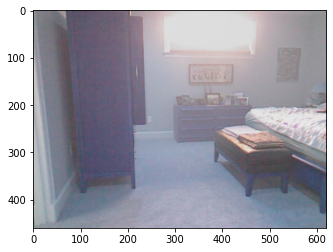

In [5]:
plt.imshow(cv2.imread(list_hazy_imgs[0]))

In [45]:
def get_clear(hazy_img_path, clear_fold_path):
    hazy_img_path = hazy_img_path.replace('\\', '/')
    clear_file = hazy_img_path.split('/')[-1].split('_')[0] + '.png'
    clear_img_path = os.path.join(clear_fold_path, clear_file)
    return clear_img_path

def pipeline_finetune(hazy, clear):
    dehaze_img = cap_dehaze(hazy, config['cap'])
#     plt.imshow(dehaze_img)
    psnr = compute_psnr(clear_img, dehaze_img)
    ssim = compute_ssim(clear_img, dehaze_img, multichannel=True)
    return psnr, ssim

In [46]:
# list_omegas = list(np.arange(0.1, 1.0, 0.05))
list_betas = list(np.arange(0.1, 2.0, 0.05))

In [47]:
list_psnr = []
list_ssim = []
for b in tqdm(list_betas):
    config['cap']['beta'] = b
    hazy_img = cv2.imread(list_hazy_imgs[1])
    clear = get_clear(list_hazy_imgs[1], clear_fold_path)
    clear_img = cv2.imread(clear)
    psnr, ssim = pipeline_finetune(hazy_img, clear_img)
    list_psnr.append(psnr)
    list_ssim.append(ssim)
#     break

100%|██████████████████████████████████████████████████████████████| 38/38 [00:13<00:00,  2.75it/s]


In [49]:
# list_psnr,list_ssim

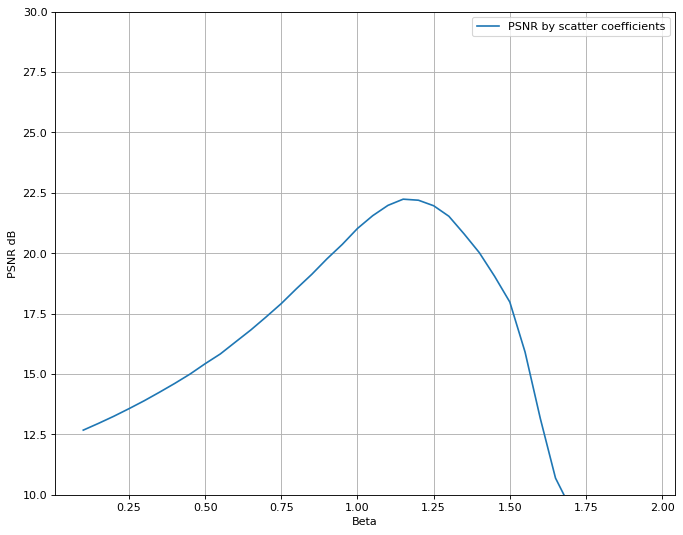

In [50]:
plt.figure(figsize=(10, 8), dpi=80)
plt.ylim(10,30)
plt.plot(list_betas,list_psnr)
# plt.plot(list_betas,list_ssim)
plt.legend(['PSNR by scatter coefficients'], loc='upper right')
plt.xlabel('Beta')
plt.ylabel('PSNR dB')
plt.grid()
plt.savefig('../result/beta_cap_psnr.png')
# plt.show()

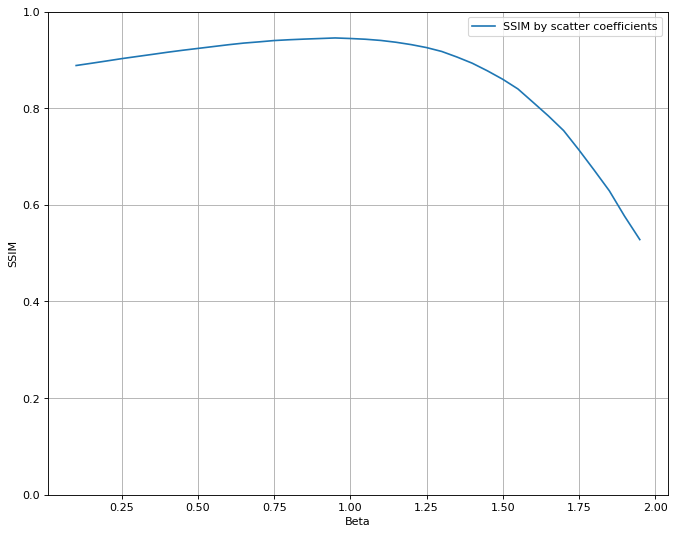

In [15]:
plt.figure(figsize=(10, 8), dpi=80)
plt.ylim(0,1)
plt.plot(list_betas,list_ssim)
# plt.plot(list_betas,list_ssim)
plt.legend(['SSIM by scatter coefficients'], loc='upper right')
plt.xlabel('Beta')
plt.ylabel('SSIM')
plt.grid()
plt.savefig('../result/beta_cap_ssim.png')
# plt.show()